In [8]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('cars.csv', encoding='latin1', on_bad_lines='skip')
df

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience
...,...,...,...,...,...,...,...,...,...
1216245,1233038,79900,2017,25,East Hanover,NJ,YV4BC0ZX0H1128239,Volvo,XC90T8
1216246,1233039,80895,2017,10,Corte Madera,CA,YV4BC0ZX0H1124188,Volvo,XC90T8
1216247,1233040,68755,2018,2500,Englewood,NJ,YV4A22PL4J1212676,Volvo,XC90T6
1216248,1233041,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216250 entries, 0 to 1216249
Data columns (total 9 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   Id       1216250 non-null  int64 
 1   Price    1216250 non-null  int64 
 2   Year     1216250 non-null  int64 
 3   Mileage  1216250 non-null  int64 
 4   City     1216250 non-null  object
 5   State    1216250 non-null  object
 6   Vin      1216250 non-null  object
 7   Make     1216250 non-null  object
 8   Model    1216250 non-null  object
dtypes: int64(4), object(5)
memory usage: 83.5+ MB


In [9]:
display(HTML(df.isnull().sum().to_frame().to_html()))

,0
Id,0
Price,0
Year,0
Mileage,0
City,0
State,0
Vin,0
Make,0
Model,0


In [10]:
df.duplicated().sum()

0

## Data Visualization

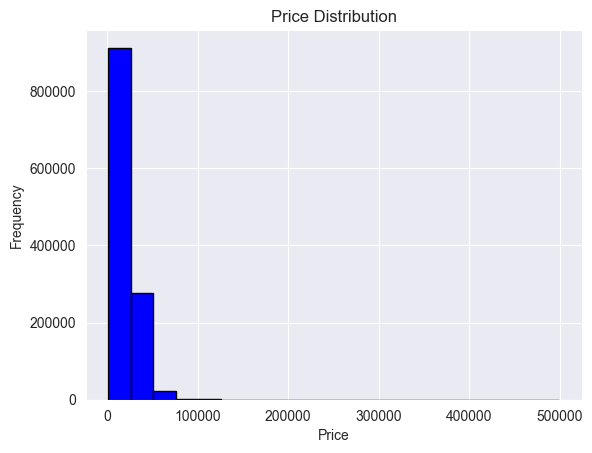

In [17]:
df['Price'].hist(bins=20, color='blue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

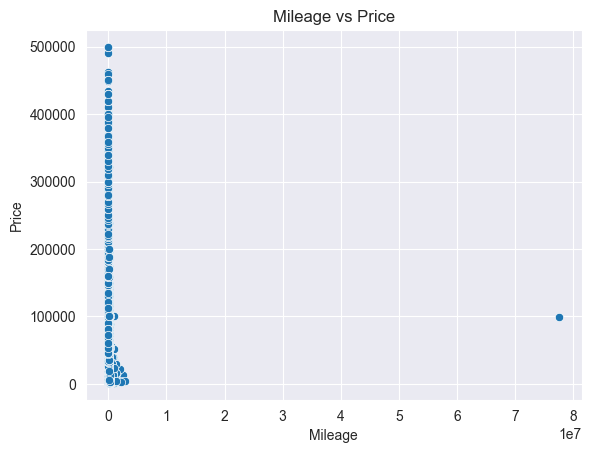

In [20]:
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title('Mileage vs Price')
plt.show()

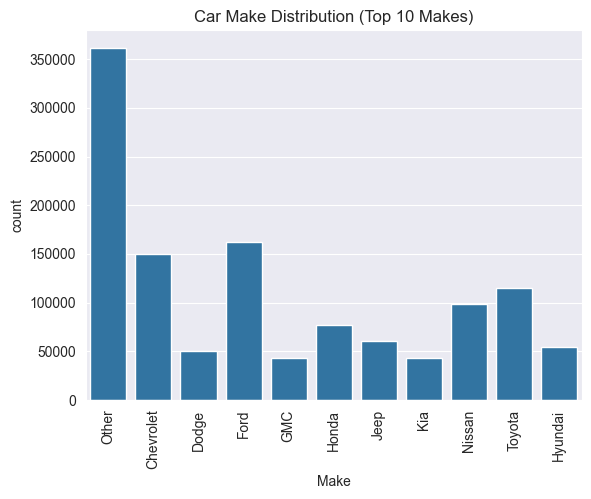

In [21]:
# Get the count of occurrences of each category
make_counts = df['Make'].value_counts()

# Filter out the top 10 most common makes
top_makes = make_counts.head(10).index
df['Make'] = df['Make'].apply(lambda x: x if x in top_makes else 'Other')

# Now plot
sns.countplot(x='Make', data=df)
plt.xticks(rotation=90)
plt.title('Car Make Distribution (Top 10 Makes)')
plt.show()

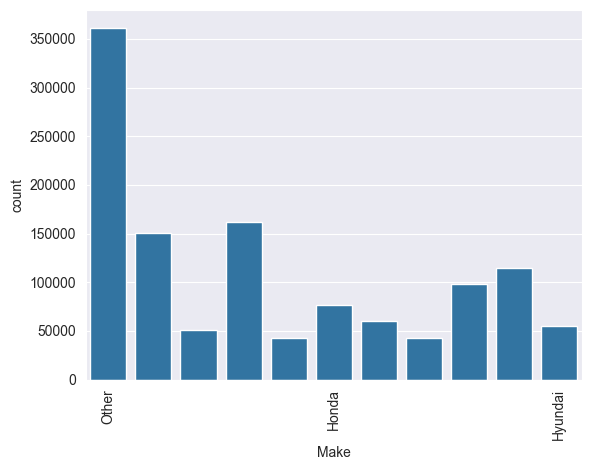

In [22]:
ax = sns.countplot(x='Make', data=df)
ax.set_xticks(ax.get_xticks()[::5])  # Show only every 5th tick
plt.xticks(rotation=90)
plt.show()

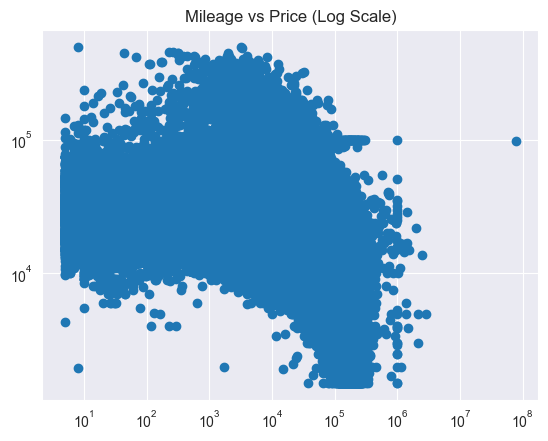

In [23]:
plt.scatter(df['Mileage'], df['Price'])
plt.xscale('log')  # Use logarithmic scale for the x-axis
plt.yscale('log')  # Use logarithmic scale for the y-axis
plt.title('Mileage vs Price (Log Scale)')
plt.show()

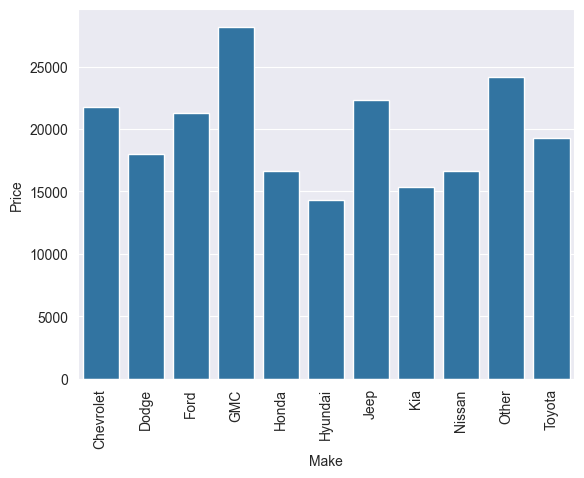

In [24]:
df_grouped = df.groupby('Make')['Price'].mean().reset_index()
sns.barplot(x='Make', y='Price', data=df_grouped)
plt.xticks(rotation=90)
plt.show()

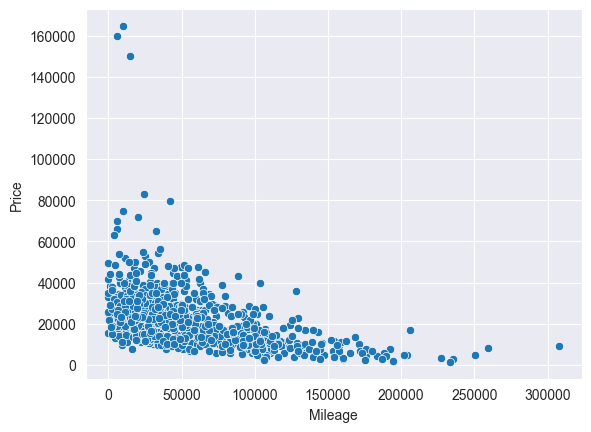

In [25]:
df_sample = df.sample(1000, random_state=42)  # Randomly sample 1000 rows
sns.scatterplot(x='Mileage', y='Price', data=df_sample)
plt.show()

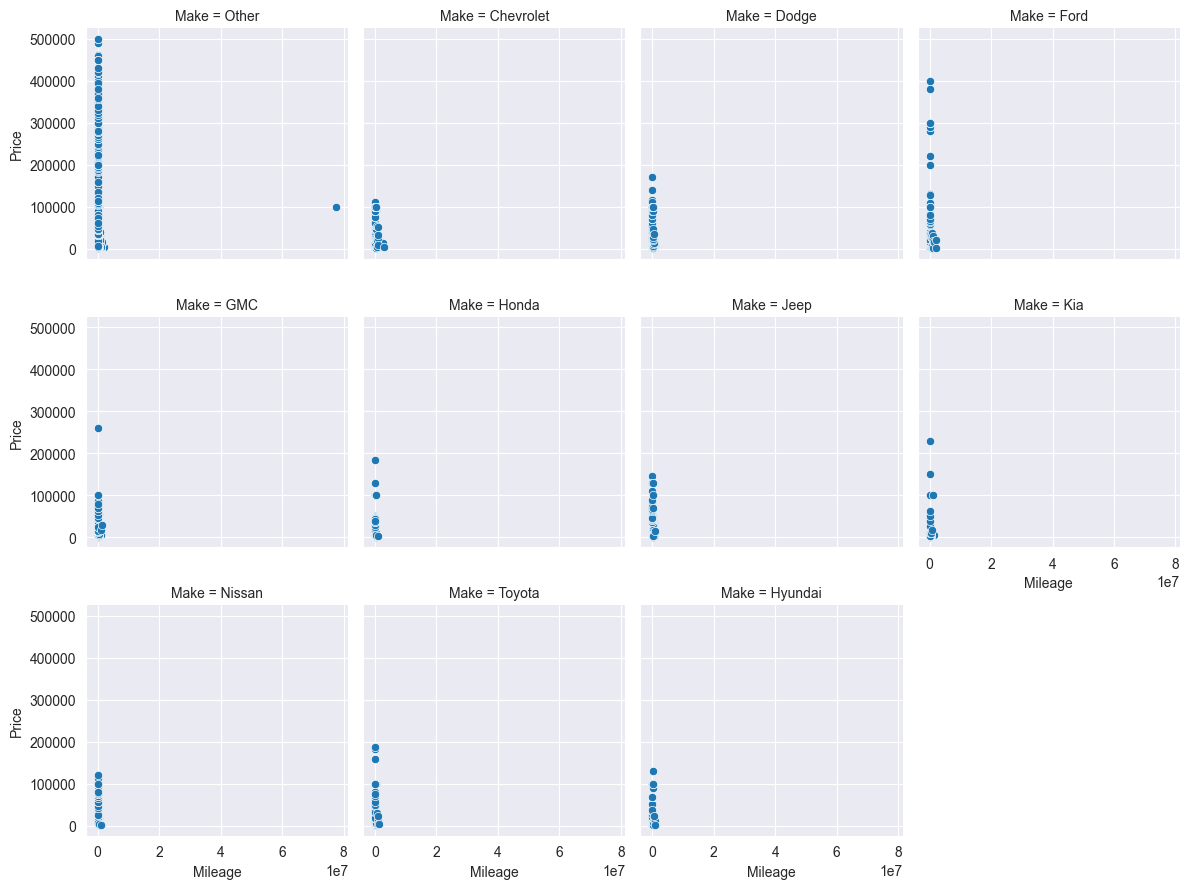

In [26]:
g = sns.FacetGrid(df, col="Make", col_wrap=4, height=3)
g.map(sns.scatterplot, 'Mileage', 'Price')
plt.show()

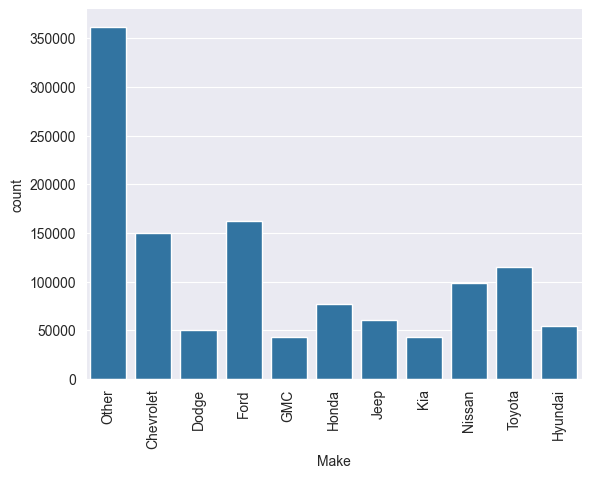

In [27]:
sns.countplot(x='Make', data=df)
sns.despine()
plt.xticks(rotation=90)
plt.show()